In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sea
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.facecolor"] = plt.rcParams["axes.facecolor"]    = "#f5f5f5"
plt.rcParams["axes.spines.top"]  = plt.rcParams["axes.spines.right"] = False
plt.rcParams["figure.dpi"] = 100

In [2]:
data = pd.read_csv("/kaggle/input/economic-guide-to-college-majors/college_majors.csv")

print(f"DATA'S DIMENSIONS: {data.shape}\n")
print(f"DATA'S NAN COUNT: {data.isnull().sum().sum()}\n")
print(f"DATA'S DUPLICATES:")
data.loc[data.duplicated(keep="first")==1]

DATA'S DIMENSIONS: (173, 21)

DATA'S NAN COUNT: 4

DATA'S DUPLICATES:


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs


</center>
<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Data Processing</div>

In [3]:
data.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,...,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.1019,7,640,...,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.1530,3,648,...,133,340,16,0.0241,73000,50000,105000,456,176,0


In [4]:
def process_data(dataframe):
    dataframe.rename(columns={"Median":"medianSalary", "P25th":"P25th_salary", "P75th":"P75th_salary"}, inplace=True)
    dataframe.columns = dataframe.columns.str.lower()
    dataframe.dropna(inplace=True)
    return dataframe

In [5]:
data_copy = data.copy()
data = process_data(data)

# Only sample sizes >= 30 will be used in order to satisfy the condition of the Central Limit Theorem and have the 
# estimated statistics properly describing the population's parameters 
data = data.loc[data.sample_size>=30]

</center>
<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">What is the median salary of different careers?</div>

In [6]:
careerSalary = pd.pivot_table(data=data, index="major_category", values="mediansalary").sort_values(by="mediansalary", ascending=False)

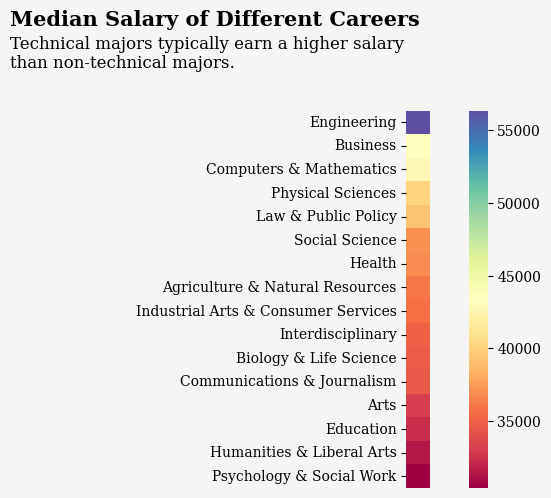

In [7]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

sea.heatmap(careerSalary, square=True, cmap="Spectral", xticklabels=False, ax=ax).set(xlabel=None, ylabel=None)

fig.text(.325,1.05,"Median Salary of Different Careers", fontweight="bold", fontsize=15)
fig.text(.325,.965,"Technical majors typically earn a higher salary\nthan non-technical majors.",fontweight="medium",fontsize=12)
plt.show()

<h3 align="center"><font color='green'>If you major in a technical career, such as Engineering, Business, or Science, there is a greater chance of you earning a higher salary, on average, than other majors of choice!</font></h3>




</center>
<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">What are the Top 10 Majors with Highest Median Salaries? What about Lowest?</div>

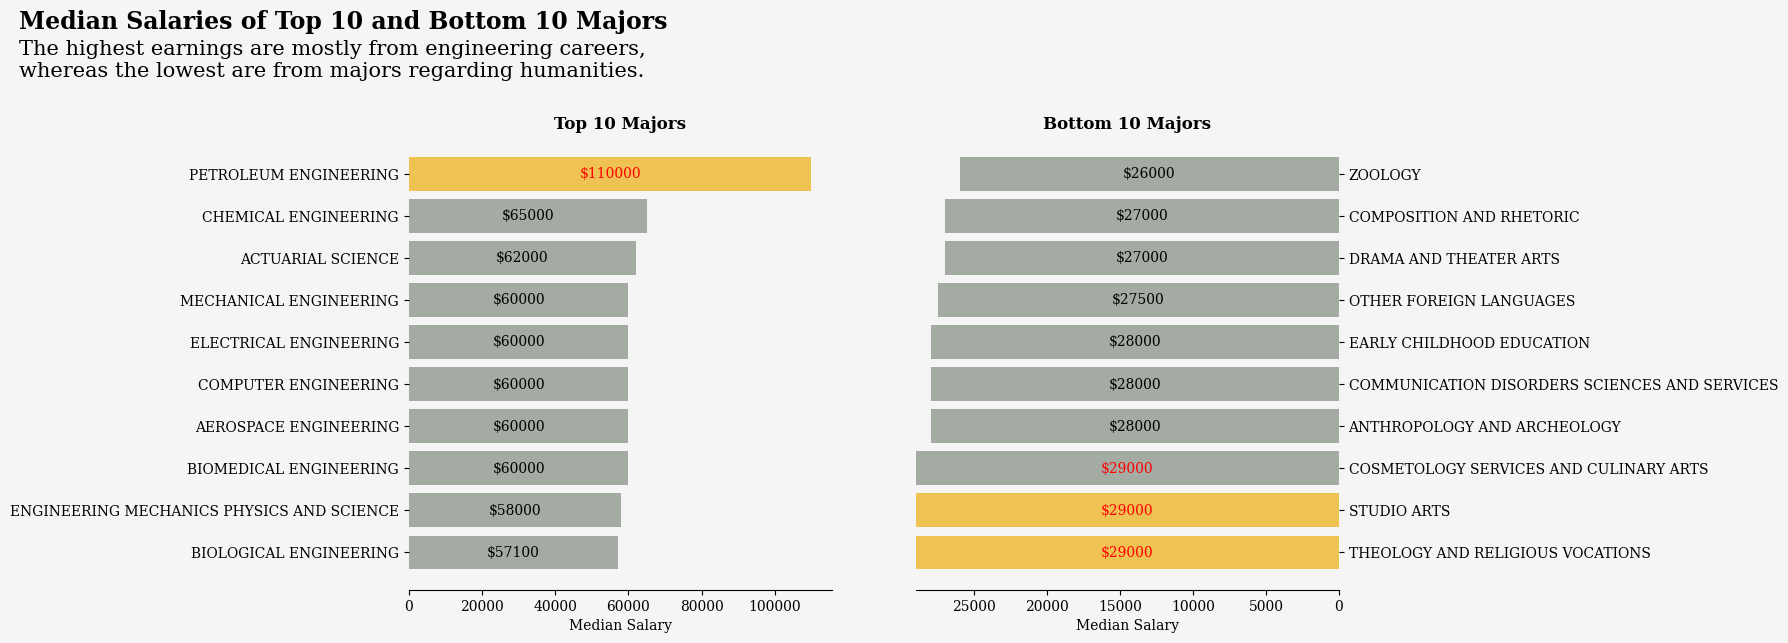

In [8]:
top10 = data.loc[data.major.isin(data.major[:10])].sort_values(by="rank", ascending=False)
bottom10 = data.loc[data.major.isin(data.major[-10:])]

# Colors for highlighting bars
top10_Highlights = ["#A3ABA3"]*10
top10_Highlights[-1] = "#EFC353"

bottom10_Highlights = ["#A3ABA3"]*10
bottom10_Highlights[0] = bottom10_Highlights[1] = "#EFC353"

# Graphs and labels
fig,ax = plt.subplots(1,2, figsize=(12,6))

ax[0].barh(top10.major, top10.mediansalary, color=top10_Highlights)

ax[1].barh(bottom10.major, bottom10.mediansalary, color=bottom10_Highlights)
ax[1].yaxis.tick_right()                                                     # Moves y axis to the right
ax[1].set_xlim(bottom10.mediansalary.max(),0)                                # Invert bars by inverting x axis

ax[0].set_xlabel("Median Salary")
ax[1].set_xlabel("Median Salary")
ax[0].set_title("Top 10 Majors", fontweight="bold")
ax[1].set_title("Bottom 10 Majors", fontweight="bold")

# Add money values to bars
for salary,major in zip(top10.mediansalary, top10.major):
    if salary > 100000:
        ax[0].annotate(f"${salary}",
                   xy=(salary/2,major),
                   ha="center", va="center", color="red")
    else:
        ax[0].annotate(f"${salary}",
                       xy=(salary/2,major),
                       ha="center", va="center")
        
for salary,major in zip(bottom10.mediansalary, bottom10.major):
    if salary == bottom10.mediansalary.max():
        ax[1].annotate(f"${salary}",
                   xy=(salary/2,major),
                   ha="center", va="center", color="red")
    else:
        ax[1].annotate(f"${salary}",
                       xy=(salary/2,major),
                       ha="center", va="center") 
# Strip spines        
for i in range(2):
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["right"].set_visible(False)

# Main title and commentary
fig.text(-.2, 1.06, "Median Salaries of Top 10 and Bottom 10 Majors", fontsize=17, fontweight="bold")
fig.text(-.2, .98, "The highest earnings are mostly from engineering careers,\nwhereas the lowest are from majors regarding humanities.", 
         fontsize=15, fontweight="medium")
plt.show()


<h3 align="center"><font color='green'>Engineering degrees can be observe to amass the individual a greater income than degrees concerning less with scientific advancements, although pursuing a degree simply for money is not always wise!</font></h3>

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">What is the median number of low wage jobs in each career?</div>

In [9]:
lowWageJobs = pd.pivot_table(data=data, index="major_category", values="low_wage_jobs", aggfunc="median").sort_values(by="low_wage_jobs", 
                                                                                                                      ascending=False)

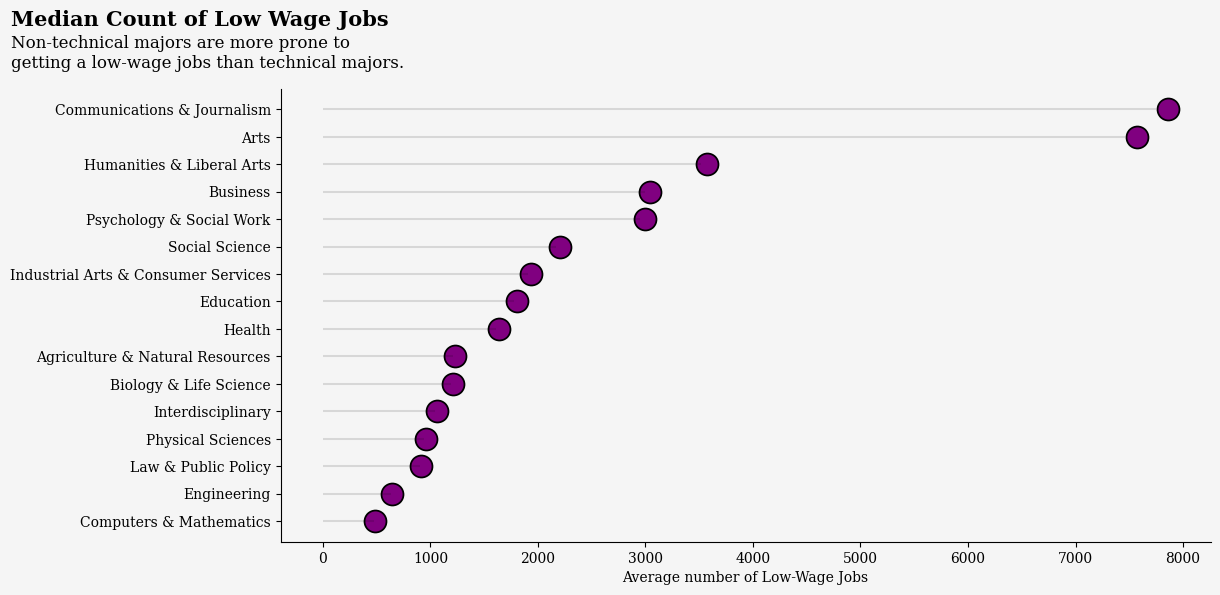

In [10]:
fig,ax = plt.subplots(1,1,figsize=(12,6))

sea.scatterplot(data=lowWageJobs, y=lowWageJobs.index, x="low_wage_jobs", s=250, alpha=1, color="purple", edgecolor="black",
                ax=ax).set(ylabel=None, xlabel="Average number of Low-Wage Jobs") 
for career in lowWageJobs.index:
    ax.hlines(y=career, xmin=0, xmax=.985*lowWageJobs.loc[career], color="black", alpha=.12)
    
fig.text(-.1,.985,"Median Count of Low Wage Jobs",fontsize=15, fontweight="bold")
fig.text(-.1,.915,"Non-technical majors are more prone to \ngetting a low-wage jobs than technical majors.",fontsize=12, fontweight="medium")
plt.show()



<h3 align="center"><font color='red'>Not only do non-technical careers make less money, but they also face a higher prospect of receiving low-wage jobs, something to be mindful toward when choosing the appropriate career. </font></h3>



</center>
<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Which Careers Show Better Employment?</div>

In [11]:
employment = pd.pivot_table(data=data, index="major_category", values="employed", aggfunc="median").sort_values(by="employed", ascending=False)
unemployment = pd.pivot_table(data=data, index="major_category", values="unemployed", aggfunc="median").sort_values(by="unemployed", ascending=False)

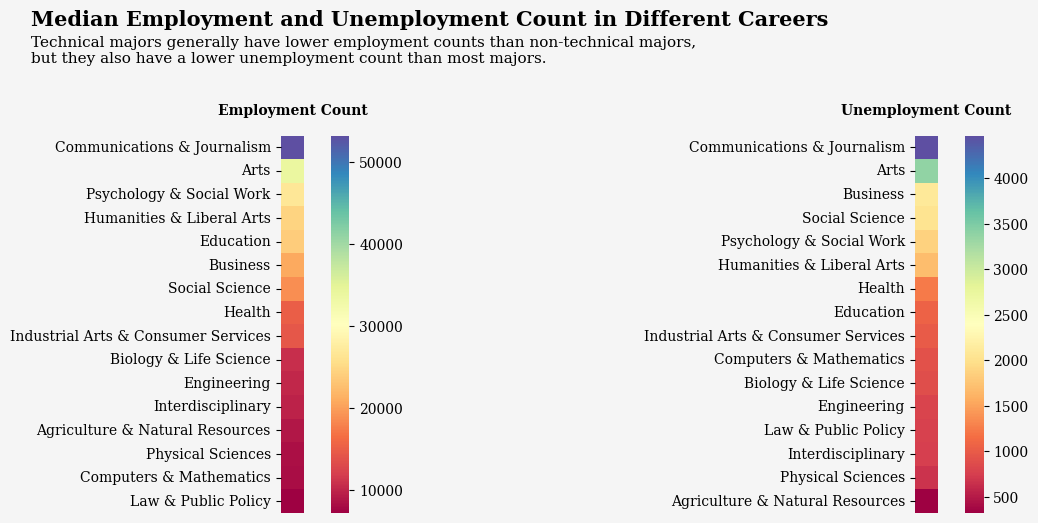

In [12]:
fig,ax = plt.subplots(1,2,figsize=(15,5))

sea.heatmap(employment, square=True,ax=ax[0],xticklabels=False, cmap="Spectral").set(ylabel=None)
sea.heatmap(unemployment, square=True,ax=ax[1],xticklabels=False, cmap="Spectral").set(ylabel=None)

ax[0].set_title("Employment Count", fontsize=10, fontweight="bold", pad=15)
ax[1].set_title("Unemployment Count", fontsize=10, fontweight="bold", pad=15)

fig.text(.225, 1.1, "Median Employment and Unemployment Count in Different Careers", fontsize=15, fontweight="bold")
fig.text(.225, 1.025, "Technical majors generally have lower employment counts than non-technical majors, \nbut they also have a lower unemployment count than most majors.", 
         fontsize=11, fontweight="medium")
plt.show()


<h3 align="center"><font color='green'>Although Communications & Journalism and Arts have higher employment counts than other careers, they ALSO show a higher count of low-wage jobs AND a greater likelihood at facing a poor income source, a relevation which can demotivate the individual from continuing with the career when realized too late.</font></h3>



</center>
<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Are certain majors more able to work a job relevant to their career while enrolled in college?</div>

In [13]:
sorted_careers= ['Engineering', 'Biology & Life Science', 'Computers & Mathematics','Physical Sciences','Health',
                'Agriculture & Natural Resources', 'Arts', 'Industrial Arts & Consumer Services', 'Social Science','Law & Public Policy',
                'Business','Humanities & Liberal Arts', 'Education', 'Psychology & Social Work','Communications & Journalism',
                "Interdisciplinary"]

sorted_careers = list(reversed(sorted_careers))

In [14]:
careerRelatedJobs = pd.pivot_table(data=data, index="major_category", values="college_jobs", aggfunc="median")
nonCareerRelatedJobs = pd.pivot_table(data=data, index="major_category", values="non_college_jobs", aggfunc="median")

careerRelatedJobs = careerRelatedJobs.reindex(sorted_careers)
nonCareerRelatedJobs = nonCareerRelatedJobs.reindex(sorted_careers)

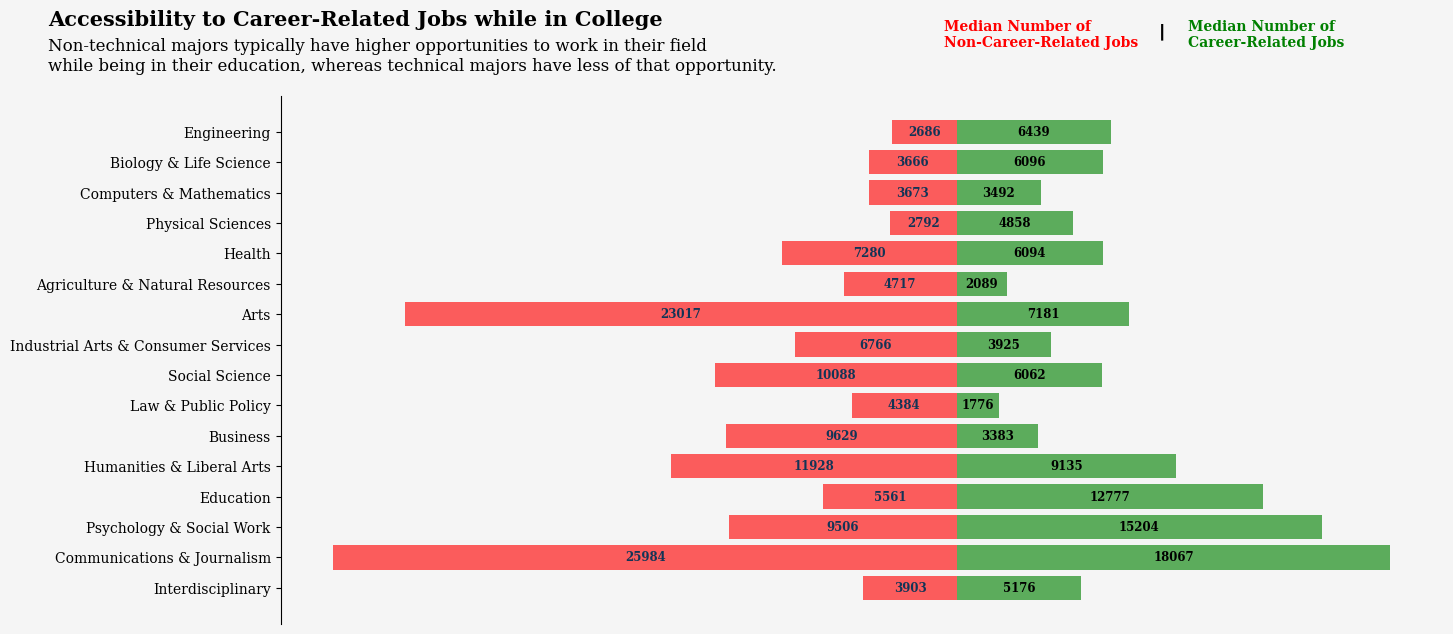

In [15]:
fig,ax = plt.subplots(1,1, figsize=(15,7))

ax.barh(sorted_careers, careerRelatedJobs.college_jobs, color="green", alpha=.625)        # Adjust alpha value to reduce the color's intensity
ax.barh(sorted_careers, -nonCareerRelatedJobs.non_college_jobs, color="red", alpha=.625)      


for i,career in enumerate(sorted_careers):
    # Values on green bars
    ax.annotate(f"{careerRelatedJobs.college_jobs[career]:.0f}",
                xy=(careerRelatedJobs.college_jobs[career]/2, career),
                ha="center",va="center", fontsize=8.5, color="black", fontweight="bold")
    # Values on red bars
    ax.annotate(f"{nonCareerRelatedJobs.non_college_jobs[career]:.0f}",
                xy=(-nonCareerRelatedJobs.non_college_jobs[career]/2, career),
                ha="center",va="center", fontsize=8.5, color="#123456", fontweight="bold")

# Removes x-xaxis
ax.get_xaxis().set_visible(False)
ax.spines["bottom"].set_visible(False)

# Text annotations
fig.text(-.03,.98,"Accessibility to Career-Related Jobs while in College", fontsize=15, fontweight="bold")
fig.text(-.03,.916,"Non-technical majors typically have higher opportunities to work in their field\nwhile being in their education, whereas technical majors have less of that opportunity.",
        fontweight="medium", fontsize=12)

fig.text(.567,.95, "Median Number of \nNon-Career-Related Jobs", color="red", fontweight="bold")
fig.text(.71,.965, "┃")
fig.text(.73,.95, "Median Number of \nCareer-Related Jobs", color="green", fontweight="bold")
plt.show()


<h3 align="center"><font color='green'>Not only are technical majors shown to make more money and have more high-wage jobs, they also have a greater access to jobs that are relevant to what they are pursuing WHILE actively studying in college.</font></h3>



</center>
<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">What is the Count of men and women in different careers? What about the proportion of women?</div>

In [16]:
careerMenCount = pd.pivot_table(data=data, index="major_category", values="men", aggfunc="median").sort_values(by="men", ascending=False)
careerWomenCount = pd.pivot_table(data=data, index="major_category", values="women", aggfunc="median").sort_values(by="women", ascending=False)

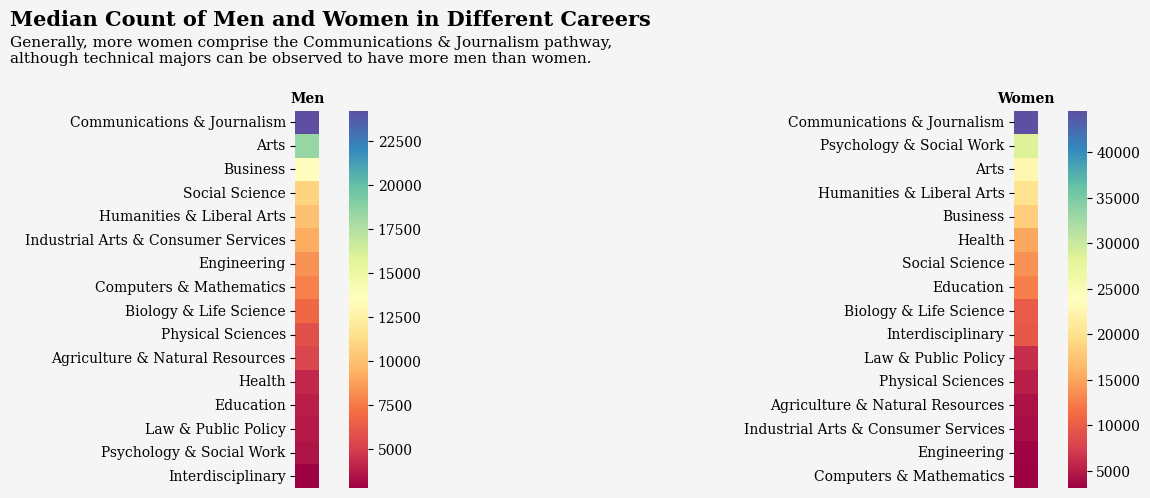

In [17]:
fig,ax = plt.subplots(1,2,figsize=(17,5))

sea.heatmap(careerMenCount, square=True,ax=ax[0], xticklabels=False, cmap="Spectral").set(ylabel=None)
sea.heatmap(careerWomenCount, square=True,ax=ax[1], xticklabels=False, cmap="Spectral").set(ylabel=None)

ax[0].set_title("Men", fontsize=10, fontweight="bold")
ax[1].set_title("Women", fontsize=10, fontweight="bold")

fig.text(.225, 1.05, "Median Count of Men and Women in Different Careers", fontsize=15, fontweight="bold")
fig.text(.225, .975, "Generally, more women comprise the Communications & Journalism pathway, \nalthough technical majors can be observed to have more men than women.", 
         fontsize=11, fontweight="medium")
plt.show()

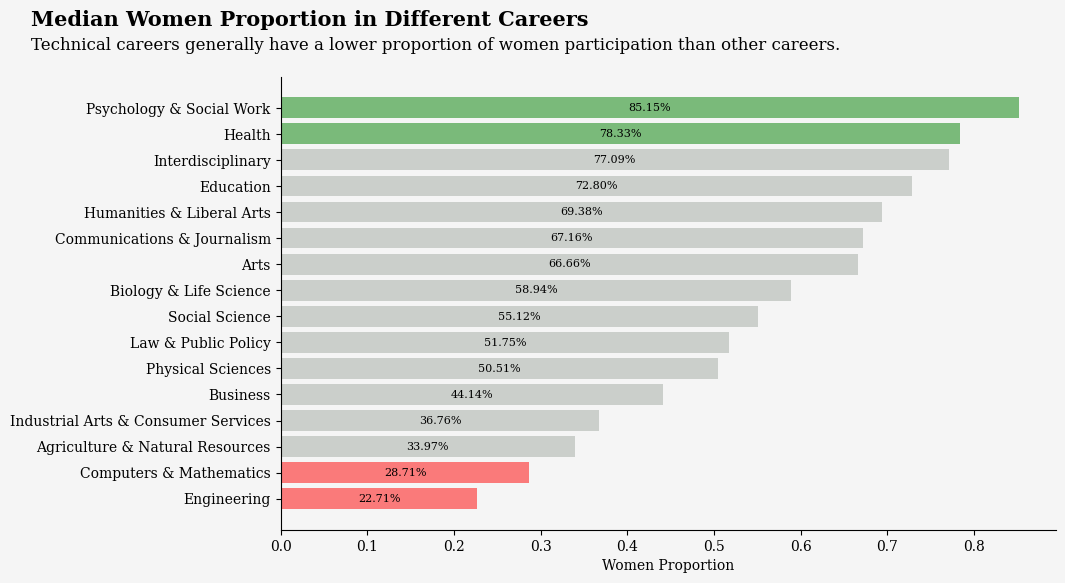

In [18]:
# Proportion of women 
women_pct = pd.pivot_table(data=data, index="major_category", values="sharewomen", aggfunc="median")
women_pct.sort_values(by="sharewomen", inplace=True)

highlights = ["#A3ABA3"]*women_pct.shape[0]
highlights[0] = highlights[1] = "red"
highlights[-1] = highlights[-2] = "green"

fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.barh(women_pct.index, women_pct.sharewomen, alpha=.5, color=highlights)

for x,y in zip(women_pct.sharewomen, women_pct.index):
    ax.annotate(f"{x*100:.2f}%",
                xy=(x/2, y),
                va="center", ha="center", fontsize=8)
    
fig.text(-.125,.965, "Median Women Proportion in Different Careers", fontweight="bold", fontsize=15)
fig.text(-.125,.925, "Technical careers generally have a lower proportion of women participation than other careers.",
        fontweight="medium", fontsize=12)
ax.set_xlabel("Women Proportion")
plt.show()

<h3 align="center"><font color='green'>Women appears to dominate many aspects in humanities-related careers (non-technical), such as Communications & Journalism and Arts, whereas there are more men in more scientific careers (technical), such as Engineering and Computers & Mathematics</font></h3>

</center>
<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Conclusion</div>

**Technical Majors**
> Makes a ***higher salary*** than non-technical majors, with Petroleum Engineers making the highest ($110,000)

> Contains a higher count of ***high-wage jobs*** with a relatively ***high employment count***

> Have ***more relevant work*** opportunities for students pursuing their respective degree

> Typically has ***more participation from men*** than women

**Non-Technical Majors**
> Makes a ***lower salary*** than non-technical majors, with Petroleum Engineers making the highest ($110,000)

> Contains a higher count of ***low-wage jobs*** with a relatively ***high employment count***

> Have ***less relevant work*** opportunities for students pursuing their respective degree

> Typically has ***more participation from women*** than men

<div class="alert alert-block alert-danger">  
<b>Technical Majors:</b> If you consider a career in in Engineering or Science in general, although you will make more money and may be more able to actively involve in works relevant to your studies, the competition may be high and the slightest possibility of even receiving a job offer will be minimal if no hard work is dedicated into your education. 
</div>


<div class="alert alert-block alert-danger">  
<b>Non-technical Majors:</b> Even though non-technical careers face the highest prospect of a poor living and receiving few jobs relevant to the respective studies, hard work can always propel the individual beyond the defined statistics and form significant changes that can defy all established data.
</div>